### Clusterin using extracted features and `KMeans` algorithm:

In [44]:
import numpy as np
from sklearn.cluster import KMeans
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import seaborn as sns
import pandas as pd


In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
features_mat = np.load('/content/drive/My Drive/Data/ProcessedData/World/distance matrix/DTW_3300.npy')

In [47]:
features_mat.shape

(3294, 3294)

In [48]:
def chunk_to_clusters(arr):
    num_cluster = max(arr) + 1
    clusters = []
    for i in range(num_cluster):
        a = np.where(arr == i)[0]
        clusters.append(list(a))

    return clusters

In [49]:
from sklearn.cluster import MiniBatchKMeans


def mini_KMeans(symmetric_difference_matrix):
    k = 300 # Number of clusters
    batch_size = 30  # Number of samples per batch
    max_iter = 400  # Maximum number of iterations

    mini_batch_kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, max_iter=max_iter)
    cluster_labels = mini_batch_kmeans.fit_predict(symmetric_difference_matrix)

    return cluster_labels


In [50]:
clusters = mini_KMeans(features_mat)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [77]:
labels = _

<Axes: ylabel='Count'>

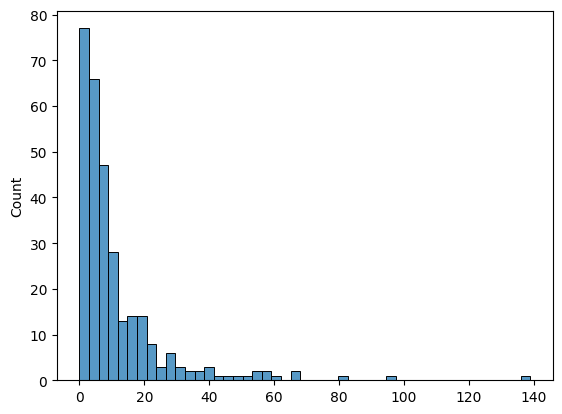

In [52]:
sns.histplot([len(a) for a  in clusters])

In [53]:
def time_series_cluster(clusters,labels,dataset):
  S = np.empty(len(clusters),dtype=object)
  for index,cluster in enumerate(clusters):
      names = []
      # plt.figure(figsize=(18,3))
      # plt.title(f'Cluster {index+1}')
      target = np.empty(len(cluster),dtype=object)
      for ind , stock in enumerate(cluster):
          target[ind] = dataset[labels[stock]];
          names.append(labels[stock])
      # print(target.shape)
      # break
      S[index] = target
  return S

In [54]:
stock_names = np.load('/content/drive/My Drive/Data/ProcessedData/World/Names/5400_names.npy')
selected_names_id = np.load('/content/drive/My Drive/Data/ProcessedData/World/Names/3300_names_id.npy')
selected_names = stock_names[selected_names_id]
time_series = pd.read_csv('/content/drive/MyDrive/Data/ProcessedData/World/TimeSeries_long.csv',index_col=0).interpolate()

In [55]:
for col in time_series.columns:
    time_series[col] = (time_series[col] - time_series[col].mean()) / time_series[col].max()

# Print the updated DataFrame
time_series.head()

,OMER,CGAU,BFC,US.MI,001979.SZ,HNI,AQB,KRC,URI,TRUE.BK,...,INVE,ITUB,KOS,9983.T,AKSO.OL,RPOWER.NS,STT,EDIT,0267.HK,CPF
0,0.092860,-0.155400,-0.222418,-0.221727,0.350624,-0.053565,-0.027542,-0.006067,-0.147703,0.132025,...,-0.187554,0.184951,0.052283,-0.229702,0.250994,0.617041,0.179613,0.075672,0.135217,0.054827
1,0.134074,-0.173922,-0.222418,-0.236610,0.285613,-0.062703,-0.020001,-0.014035,-0.138377,0.110814,...,-0.177317,0.218668,0.064642,-0.250132,0.233283,0.575858,0.197100,0.087706,0.085037,0.065152
2,0.096232,-0.171178,-0.227996,-0.231649,0.192479,-0.047854,-0.020329,-0.013712,-0.133865,0.110814,...,-0.178023,0.178665,0.025507,-0.255119,0.253549,0.579026,0.188658,0.105370,0.077657,0.074082
3,0.077499,-0.161574,-0.227996,-0.239693,0.173488,-0.065940,-0.021968,-0.037938,-0.157211,0.121420,...,-0.183318,0.165521,0.014178,-0.257613,0.264618,0.608593,0.145759,0.067944,0.082085,0.052595
4,0.081246,-0.167748,-0.225255,-0.231649,0.121260,-0.019868,-0.018690,-0.019311,-0.152638,0.121420,...,-0.183318,0.186094,0.028597,-0.270401,0.255763,0.665616,0.158422,0.072470,0.051092,0.067385


In [56]:
S = time_series_cluster(clusters,selected_names,time_series)

In [57]:
np.save('/content/drive/MyDrive/Data/Clusters/simple_cluster1',S)

In [58]:
import matplotlib.pyplot as plt

def plot_clusters(clusters,labels,dataset):
    for index,cluster in enumerate(clusters):
        names = []
        plt.figure(figsize=(18,3))
        plt.title(f'Cluster {index+1}')
        for stock in cluster:
            plt.plot(dataset[labels[stock]]);
            names.append(labels[stock])
        plt.ylabel('Normalaized Close Price')
        plt.xlabel('day')
        # plt.savefig(f'/content/drive/My Drive/Results/test/Cluster{index+1}.png', format='png')

In [ ]:
plot_clusters(clusters,selected_names,time_series)

---

In [60]:
import torch

In [61]:
# stock_names = torch.load('/content/drive/My Drive/Data/ProcessedData/World/Names/5400_names.npy')
path = '/content/drive/MyDrive/Data/Node Embeddings'
embed = []
em = torch.load(f'{path}/node_embedding{14}.pt',map_location=torch.device('cpu'))
em = torch.detach(torch.Tensor.cpu(em)).numpy()
embed.append(em)
print(em.shape)
# names = np.load('/content/drive/MyDrive/Data/ProcessedData/World/Names/5400_names.npy')
# print(names.shape)
# time_series = pd.read_csv('/content/drive/MyDrive/Data/ProcessedData/World/TimeSeries_long.csv',index_col=0).interpolate()

(3294, 64)


In [69]:
mean = em.flatten().mean()
std = em.flatten().std()

In [70]:
mean,std

(-1.3000338, 8.946527)

In [73]:
random_em = (np.random.randn(3294, 64)*std+ mean)
print(np.mean(random_em))
np.std(random_em)

-1.305572475372921


8.947057158511965

<Axes: ylabel='Count'>

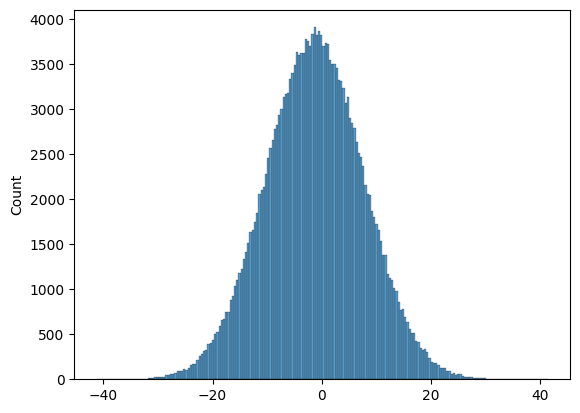

In [74]:
sns.histplot(random_em.flatten())

In [75]:
def kmeans(features,n):
    kmeans = KMeans(n_clusters=n,init='k-means++')
    kmeans.fit(features)
    # Get the cluster labels for each node
    return kmeans.labels_

In [80]:
a = kmeans(random_em,300)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [81]:
clusters = chunk_to_clusters(a)
S = time_series_cluster(clusters,selected_names,time_series)
np.save('/content/drive/MyDrive/Data/Clusters/fake_cluster1',S)

---
---
---

In [ ]:
features_mat = torch.detach(torch.Tensor.cpu(features_mat)).numpy()

# Create a KMeans object with the desired number of clusters
num_clusters = 300  # Replace with the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)

# Fit the KMeans model to your feature matrix
kmeans.fit(features_mat)

# Get the cluster labels for each node
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


---
---
## Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_clusters(clusters,labels,dataset):
    for index,cluster in enumerate(clusters):
        names = []
        plt.figure(figsize=(18,3))
        plt.title(f'Cluster {index+1}')
        for stock in cluster:
            plt.plot(dataset[labels[stock]]);
            names.append(labels[stock])
        plt.ylabel('Normalaized Close Price')
        plt.xlabel('day')
        plt.savefig(f'/content/drive/My Drive/Results/14/Cluster{index+1}.png', format='png')
        # plt.legend(names)
        # if index == 15 :
        #     break


In [ ]:
def convert_arr_to_cluster(arr):
    cls= []
    n_cluster = max(arr+1)
    for i in range(n_cluster):
        cls.append(list(np.where(arr == i)[0]))
    return cls

Load time series data :

In [ ]:
My_Dataset2 = pd.read_csv('/content/drive/My Drive/Data/ProcessedData/World/TimeSeries_long.csv',index_col=0)
# My_Dataset2.columns = [f'stock {i+1}' for i in range(My_Dataset2.shape[1])]

In [ ]:
My_Dataset2.head()

,OMER,CGAU,BFC,US.MI,001979.SZ,HNI,AQB,KRC,URI,TRUE.BK,...,INVE,ITUB,KOS,9983.T,AKSO.OL,RPOWER.NS,STT,EDIT,0267.HK,CPF
0,14.40,4.671418,42.607876,1.338275,21.845114,29.301924,2.482,54.933414,164.941833,5.928491,...,3.54,6.516191,5.480041,13928.928711,44.639999,42.599998,91.596420,33.980000,9.915198,24.226994
1,15.50,4.426983,42.607876,1.301866,20.424944,28.909918,2.574,54.323784,169.522705,5.746075,...,3.83,6.765031,5.594607,13168.732422,43.599998,40.650002,93.411011,35.070000,9.352400,24.543631
2,14.49,4.463195,42.060181,1.314003,18.390425,29.546921,2.570,54.348499,171.738953,5.746075,...,3.81,6.469798,5.231817,12983.174805,44.790001,40.799999,92.534996,36.669998,9.269635,24.817480
3,13.99,4.589940,42.060181,1.294322,17.975546,28.771086,2.550,52.494865,160.271881,5.837283,...,3.66,6.372791,5.126798,12890.394531,45.439999,42.200001,88.083443,33.279999,9.319293,24.158529
4,14.09,4.508461,42.329391,1.314003,16.834621,30.747419,2.590,53.920101,162.517792,5.837283,...,3.66,6.524626,5.260458,12414.525391,44.919998,44.900002,89.397453,33.689999,8.971682,24.612089


In [ ]:
stock_names = np.load('/content/drive/My Drive/Data/ProcessedData/World/Names/5400_names.npy')
stock_names

array(['OMER', 'CGAU', 'BFC', ..., 'EDIT', '0267.HK', 'CPF'], dtype='<U13')

In [ ]:
selected_names_id = np.load('/content/drive/My Drive/Data/ProcessedData/World/Names/3300_names_id.npy')
selected_names = stock_names[selected_names_id]


In [ ]:
selected_names_id

array([   1,    3,    4, ..., 5413, 5415, 5416])

In [ ]:
selected_names.shape

(3294,)

In [ ]:
for col in My_Dataset2.columns:
    My_Dataset2[col] = (My_Dataset2[col] - My_Dataset2[col].mean()) / My_Dataset2[col].max()

# Print the updated DataFrame
My_Dataset2.head()

,OMER,CGAU,BFC,US.MI,001979.SZ,HNI,AQB,KRC,URI,TRUE.BK,...,INVE,ITUB,KOS,9983.T,AKSO.OL,RPOWER.NS,STT,EDIT,0267.HK,CPF
0,0.092860,-0.155400,-0.222418,-0.221727,0.350624,-0.053565,-0.027542,-0.006067,-0.147703,0.132025,...,-0.187554,0.184951,0.052283,-0.229702,0.250994,0.617041,0.179613,0.075672,0.135217,0.054827
1,0.134074,-0.173922,-0.222418,-0.236610,0.285613,-0.062703,-0.020001,-0.014035,-0.138377,0.110814,...,-0.177317,0.218668,0.064642,-0.250132,0.233283,0.575858,0.197100,0.087706,0.085037,0.065152
2,0.096232,-0.171178,-0.227996,-0.231649,0.192479,-0.047854,-0.020329,-0.013712,-0.133865,0.110814,...,-0.178023,0.178665,0.025507,-0.255119,0.253549,0.579026,0.188658,0.105370,0.077657,0.074082
3,0.077499,-0.161574,-0.227996,-0.239693,0.173488,-0.065940,-0.021968,-0.037938,-0.157211,0.121420,...,-0.183318,0.165521,0.014178,-0.257613,0.264618,0.608593,0.145759,0.067944,0.082085,0.052595
4,0.081246,-0.167748,-0.225255,-0.231649,0.121260,-0.019868,-0.018690,-0.019311,-0.152638,0.121420,...,-0.183318,0.186094,0.028597,-0.270401,0.255763,0.665616,0.158422,0.072470,0.051092,0.067385


----

In [ ]:
plot_clusters(convert_arr_to_cluster(kmeans.labels_),selected_names,My_Dataset2)

---
---